## `aross-stations-db` demo

In [1]:
import aross_stations_db

print(f"Welcome; aross-statations-db v{aross_stations_db.__version__} is installed and imported.")

Welcome; aross-statations-db v0.1.dev45+g3d35165.d20240702 is installed and imported.


In [2]:
API_BASE_URL = "http://api:8000/v1"

QUERY_START_DATE = "2020-01-01"
QUERY_END_DATE = "2023-06-01"
QUERY_POLYGON = "POLYGON ((-159.32130625160698 69.56469019745796, -159.32130625160698 68.08208920517862, -150.17196253090276 68.08208920517862, -150.17196253090276 69.56469019745796, -159.32130625160698 69.56469019745796))"

SPATIOTEMPORAL_QUERY_STRING = f"start={QUERY_START_DATE}&end={QUERY_END_DATE}"
# SPATIOTEMPORAL_QUERY_STRING = f"start={QUERY_START_DATE}&end={QUERY_END_DATE}&polygon={QUERY_POLYGON}"

In [3]:
import leafmap
from ipyleaflet import (
    basemaps,
    projections,
)

STATIONS_QUERY_URL = f"{API_BASE_URL}/stations?{SPATIOTEMPORAL_QUERY_STRING}"

m = leafmap.Map(
    center=(90, 0),
    zoom=1,
    basemap=basemaps.NASAGIBS.BlueMarble3413,
    crs=projections.EPSG3413.NASAGIBS,

)
m.add_geojson(
    STATIONS_QUERY_URL,
    layer_name="ASOS stations",
)
m

Map(center=[90, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

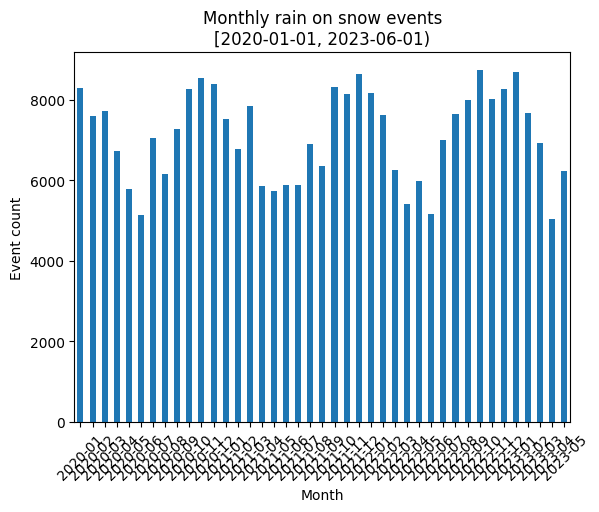

In [4]:
import datetime as dt

import pandas
import matplotlib.pyplot as plt


TIMESERIES_QUERY_URL = f"{API_BASE_URL}/events/timeseries/monthly?{SPATIOTEMPORAL_QUERY_STRING}"

def barchart(*, query_url: str, index_col: str, rot: int = 0, title: str):
    
    timeseries_data = pandas.read_json(query_url)
    timeseries_data.set_index(index_col, inplace=True)
    if index_col == "date":
        timeseries_data.index = timeseries_data.index.strftime("%Y-%m")

    return timeseries_data.plot(
        kind="bar",
        title=title,
        ylabel="Event count",
        xlabel="Month",
        rot=rot,
        legend=False,
    )

plt.show(
    barchart(
        query_url=TIMESERIES_QUERY_URL,
        index_col="date",
        rot=45,
        title=f"Monthly rain on snow events\n[{QUERY_START_DATE}, {QUERY_END_DATE})",
    )
)

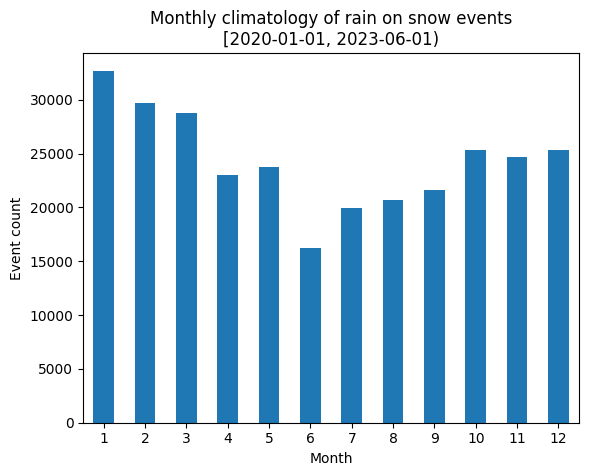

In [5]:
CLIMATOLOGY_QUERY_URL = f"{API_BASE_URL}/events/climatology/monthly?{SPATIOTEMPORAL_QUERY_STRING}"

plt.show(
    barchart(
        query_url=CLIMATOLOGY_QUERY_URL,
        index_col="month",
        title=f"Monthly climatology of rain on snow events\n[{QUERY_START_DATE}, {QUERY_END_DATE})",
    )
)